In [46]:
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, matthews_corrcoef, precision_recall_fscore_support as score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('KaggleV2-May-2016.csv')

Clean data 

In [47]:
#check number of nulls per column

print(df.isna().sum())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [48]:
#Run correlation matrix to see which columns are relevant 
df.corr()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
PatientId,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749
AppointmentID,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618
Age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643
Scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194
Hipertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267
Diabetes,0.001605,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550
Alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147
Handcap,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161
SMS_received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000


In [49]:
# create dummy variable for male and female
df = pd.get_dummies(df, columns= ['Gender'])

In [50]:
#Target Hipertension, drop columns unnecessary columns
X = df.copy()
X.drop(columns = ['PatientId','AppointmentID','ScheduledDay','AppointmentDay','No-show','Scholarship','SMS_received','Neighbourhood','Hipertension'], axis = 1, inplace = True)
y = df['Hipertension'].copy()

[0]	validation_0-aucpr:0.67796
[1]	validation_0-aucpr:0.68348
[2]	validation_0-aucpr:0.68583
[3]	validation_0-aucpr:0.68675
[4]	validation_0-aucpr:0.68588
[5]	validation_0-aucpr:0.68636
[6]	validation_0-aucpr:0.68566
[7]	validation_0-aucpr:0.68600
[8]	validation_0-aucpr:0.68680
[9]	validation_0-aucpr:0.68704
[10]	validation_0-aucpr:0.68693
[11]	validation_0-aucpr:0.68716
[12]	validation_0-aucpr:0.68718
[13]	validation_0-aucpr:0.68752
[14]	validation_0-aucpr:0.68757
[15]	validation_0-aucpr:0.68752
[16]	validation_0-aucpr:0.68759
[17]	validation_0-aucpr:0.68775
[18]	validation_0-aucpr:0.68783
[19]	validation_0-aucpr:0.68781
[20]	validation_0-aucpr:0.68825
[21]	validation_0-aucpr:0.68805
[22]	validation_0-aucpr:0.68818
[23]	validation_0-aucpr:0.68820
[24]	validation_0-aucpr:0.68808
[25]	validation_0-aucpr:0.68835
[26]	validation_0-aucpr:0.68830
[27]	validation_0-aucpr:0.68835
[28]	validation_0-aucpr:0.68877
[29]	validation_0-aucpr:0.68880
[30]	validation_0-aucpr:0.68881
[31]	validation_0-

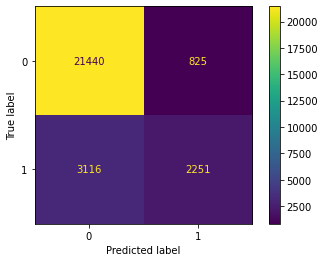

In [51]:
#Run our colleague's model

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.25,random_state = 42 )

clf = xgb.XGBClassifier(objective='binary:logistic', seed = 0,early_stopping_rounds =10,eval_metric='aucpr')
clf.fit(X_train, y_train, eval_set=[(X_test,y_test)])

print(f'The training dataset has {len(X_train)} records.')
print(f'The testing dataset has {len(X_test)} records.')

y_predicted = clf.predict(X_test)

cm = confusion_matrix(y_test,y_predicted)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot()

plt.show()

In [52]:
print(matthews_corrcoef(y_test,y_predicted))

0.48092689684388445


In [53]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,82895.0,37.140636,23.119842,0.0,18.0,37.0,55.0,115.0
Diabetes,82895.0,0.072634,0.259536,0.0,0.0,0.0,0.0,1.0
Alcoholism,82895.0,0.030521,0.172016,0.0,0.0,0.0,0.0,1.0
Handcap,82895.0,0.022390,0.162705,0.0,0.0,0.0,0.0,4.0
Gender_F,82895.0,0.649665,0.477078,0.0,0.0,1.0,1.0,1.0
Gender_M,82895.0,0.350335,0.477078,0.0,0.0,0.0,1.0,1.0


Attempt to standardize data 

In [54]:
# Initiate scaler
sc = StandardScaler()

# Standardize the training dataset
X_train_transformed = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)

# Standardized the testing dataset
X_test_transformed = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)

# Summary statistics after standardization
X_train_transformed.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,82895.0,1.288311e-16,1.000006,-1.606450,-0.827893,-0.006083,0.772474,3.367663
Diabetes,82895.0,-7.148714e-17,1.000006,-0.279862,-0.279862,-0.279862,-0.279862,3.573184
Alcoholism,82895.0,2.485764e-17,1.000006,-0.177430,-0.177430,-0.177430,-0.177430,5.636029
Handcap,82895.0,5.922975e-17,1.000006,-0.137610,-0.137610,-0.137610,-0.137610,24.446916
Gender_F,82895.0,3.124348e-17,1.000006,-1.361768,-1.361768,0.734339,0.734339,0.734339
Gender_M,82895.0,-3.124348e-17,1.000006,-0.734339,-0.734339,-0.734339,1.361768,1.361768


In [55]:
print(matthews_corrcoef(y_test,y_predicted))

0.48092689684388445


Attempt using grid search

In [56]:
estimator = xgb.XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [57]:
grid_search.fit(X, y)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc', verbose=True)

In [61]:
print(grid_search.best_estimator_)
print(matthews_corrcoef(y_test,y_predicted))

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=180,
              n_jobs=4, nthread=4, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, ...)
0.4844271836150319


Run confusion matrix

The training dataset has 82895 records.
The testing dataset has 27632 records.


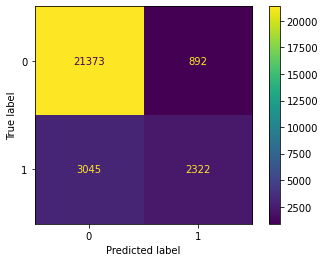

In [62]:
print(f'The training dataset has {len(X_train)} records.')
print(f'The testing dataset has {len(X_test)} records.')

y_predicted = clf.predict(X_test)

cm = confusion_matrix(y_test,y_predicted)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot()

plt.show()

Get matthews coefficient score

In [60]:
print(matthews_corrcoef(y_test,y_predicted))

0.4844271836150319
